In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from pandas.api.types import is_string_dtype, is_numeric_dtype
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
np.set_printoptions(precision=3, suppress=True)

tf.__version__

'2.3.1'

In [3]:
raw_dataset = pd.read_csv("features.csv", na_values='?'
                          , comment='\t'
                          , skipinitialspace=True)

dataset = raw_dataset.copy()

dataset.isna().sum()

# dataset = dataset.dropna()

kost_name_rough    0
kota               0
type_kos           0
area               0
facility_score     0
harga_nomina       0
dtype: int64

In [4]:
def train_cats(df):
	for n,c in df.items():
	    if is_string_dtype(c): 
	        df[n] = c.astype('category').cat.as_ordered()

train_cats(dataset)

In [5]:
dataset.drop(['kost_name_rough'], axis=1, inplace=True)

max_n_cat = None

In [6]:
for n,c in dataset.items(): 
    if not is_numeric_dtype(c) and (max_n_cat is None or c.nunique()>max_n_cat):
        dataset[n] = c.cat.codes+1

In [7]:
print(list(dataset.groupby(["kota"]).size().reset_index(name='counts')["kota"]))
print(list(raw_dataset.groupby(["kota"]).size().reset_index(name='counts')["kota"]))

print(list(dataset.groupby(["type_kos"]).size().reset_index(name='counts')["type_kos"]))
print(list(raw_dataset.groupby(["type_kos"]).size().reset_index(name='counts')["type_kos"]))

print(list(dataset.groupby(["area"]).size().reset_index(name='counts')["area"]))
print(list(raw_dataset.groupby(["area"]).size().reset_index(name='counts')["area"]))

[1, 2, 3, 4, 5, 6]
['bandung', 'jakarta', 'jogja', 'malang', 'semarang', 'surabaya']
[1, 2, 3]
['campur', 'putra', 'putri']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
['antapani', 'astanaanyar', 'babakan ciparay', 'bandung wetan', 'banjarsari', 'banyumanik', 'batu', 'bekasi selatan', 'blimbing', 'bojongloa kidul', 'buahbatu', 'cibeunying kaler', 'cibeunying kidul', 'cicendo', 'cilandak', 'coblong', 'danurejan', 'depok', 'dukuhpakis', 'duren sawit', 'gajahmungkur', 'gayamsari', 'gayungan', 'gedong tengen', 'genuk', 'godean', 'gondokusuman', 'gondomanan', 'grogol petamburan', 'gubeng', 'jatinangor', 'jetis', 'kebayoran baru', 'kelapa gading', 'kemayoran', 'kepanjen', 'kiaracondong', 'klojen', 'lengkong', 'lowokwaru', 'menteng',

In [8]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

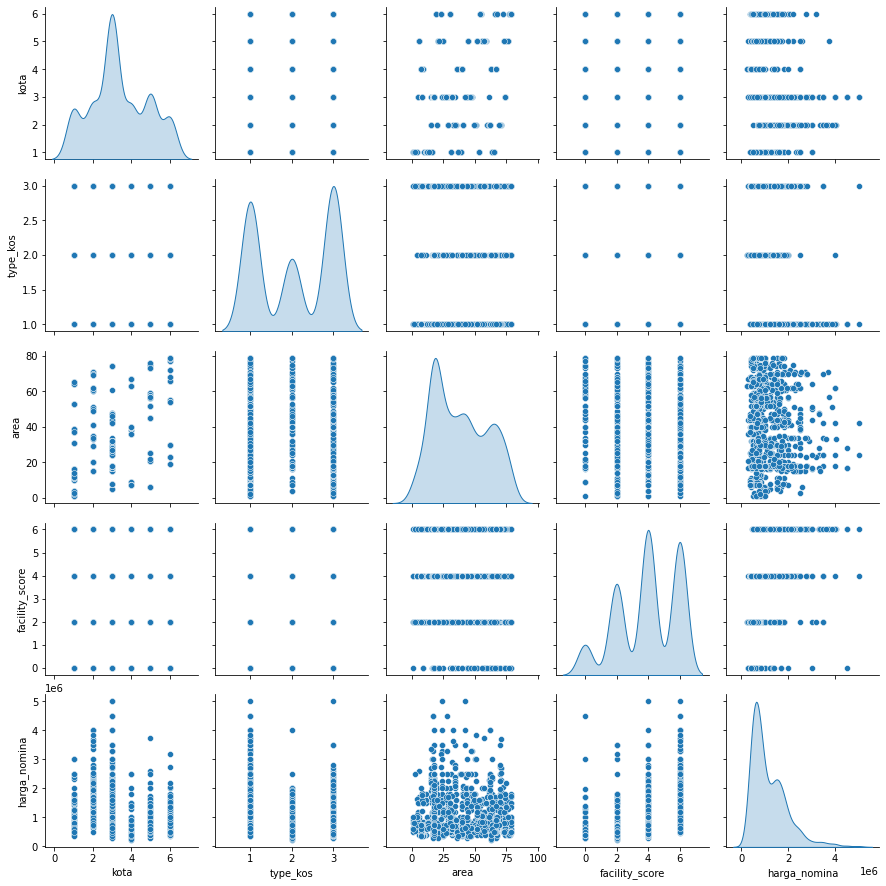

In [9]:
sns.pairplot(train_dataset, diag_kind='kde')

In [10]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kota,964.0,3.374481e+00,1.473833,1.0,2.0,3.0,5.0,6.0
type_kos,964.0,2.044606e+00,0.889002,1.0,1.0,2.0,3.0,3.0
area,964.0,3.824585e+01,21.243354,1.0,18.0,36.0,57.0,79.0
facility_score,964.0,3.906639e+00,1.857766,0.0,2.0,4.0,6.0,6.0
harga_nomina,964.0,1.179069e+06,766435.278962,225000.0,600000.0,900000.0,1600000.0,5000000.0


In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [12]:
train_labels = train_features.pop('harga_nomina')
test_labels = test_features.pop('harga_nomina')

In [13]:
train_features

,kota,type_kos,area,facility_score
486,3,1,48,6
5,6,3,54,4
438,3,1,27,2
271,2,2,50,4
967,5,3,73,2
...,...,...,...,...
509,3,2,18,6
340,3,1,42,6
221,2,1,20,4
1157,4,3,67,6


In [14]:
train_labels

486     3300000
5       1100000
438      750000
271      913000
967      650000
         ...   
509     1000000
340      650000
221     1600000
1157     900000
146     1200000
Name: harga_nomina, Length: 964, dtype: int64

In [15]:
normalizer = preprocessing.Normalization()

normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())

train_features[:5]

first = np.array(train_features[:1])

print(normalizer.mean.numpy())

[ 3.374  2.045 38.246  3.907]
[ 3.374  2.045 38.246  3.907]


In [16]:
train_features[:1]

,kota,type_kos,area,facility_score
486,3,1,48,6


In [17]:
with np.printoptions(precision=2, suppress=True):
  print(first)
  print(normalizer(first).numpy())

[[ 3  1 48  6]]
[[-0.25 -1.18  0.46  1.13]]


In [18]:
np.shape(np.array(train_features))

(964, 4)

In [19]:
model = keras.Sequential([
                            layers.Input(shape=(4,)),
                            preprocessing.Normalization(input_shape=[4,]),
                            layers.Dense(256, activation='relu'),
                            layers.Dense(512, activation='relu'),
                            layers.Dense(128, activation='relu'),
                            layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
            optimizer=tf.keras.optimizers.Adam(0.001))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 256)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 198,666
Trainable params: 198,657
Non-trainable params: 9
_________________________________________________________________


In [20]:
%%time
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100
)

CPU times: user 5.97 s, sys: 732 ms, total: 6.7 s
Wall time: 3.97 s


In [21]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 20])
    plt.xlabel('Epoch')
    plt.ylabel('Error [harga_nomina]')
    plt.legend()
    plt.grid(True)

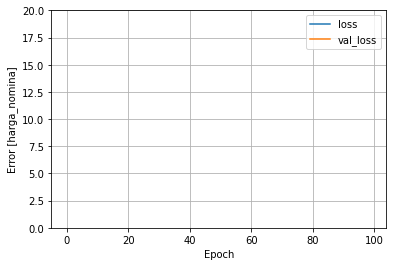

In [22]:
plot_loss(history)

In [23]:
test_result = model.evaluate(
    test_features, 
    test_labels,
    verbose=0
)
print(test_result)

475644.8125


In [24]:
%%time
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=2,
    epochs=1000
)

Epoch 1/1000
25/25 - 0s - loss: 474200.0312 - val_loss: 423462.7500
Epoch 2/1000
25/25 - 0s - loss: 474773.2188 - val_loss: 422579.1562
Epoch 3/1000
25/25 - 0s - loss: 474542.2812 - val_loss: 420679.8750
Epoch 4/1000
25/25 - 0s - loss: 473909.2188 - val_loss: 421934.3125
Epoch 5/1000
25/25 - 0s - loss: 474427.1562 - val_loss: 421471.2500
Epoch 6/1000
25/25 - 0s - loss: 477089.5312 - val_loss: 421489.5312
Epoch 7/1000
25/25 - 0s - loss: 473837.4062 - val_loss: 421149.9375
Epoch 8/1000
25/25 - 0s - loss: 473511.1875 - val_loss: 421496.5000
Epoch 9/1000
25/25 - 0s - loss: 473607.5000 - val_loss: 421921.1250
Epoch 10/1000
25/25 - 0s - loss: 473904.6875 - val_loss: 421490.7812
Epoch 11/1000
25/25 - 0s - loss: 473523.6875 - val_loss: 423435.6875
Epoch 12/1000
25/25 - 0s - loss: 476035.6562 - val_loss: 421793.4375
Epoch 13/1000
25/25 - 0s - loss: 473904.8438 - val_loss: 421700.5938
Epoch 14/1000
25/25 - 0s - loss: 475073.1250 - val_loss: 418866.2812
Epoch 15/1000
25/25 - 0s - loss: 473911.406

Epoch 120/1000
25/25 - 0s - loss: 467506.6875 - val_loss: 410064.3438
Epoch 121/1000
25/25 - 0s - loss: 467694.4062 - val_loss: 409466.6250
Epoch 122/1000
25/25 - 0s - loss: 467004.3438 - val_loss: 409036.4688
Epoch 123/1000
25/25 - 0s - loss: 466613.6562 - val_loss: 409627.9688
Epoch 124/1000
25/25 - 0s - loss: 469429.3438 - val_loss: 409173.2188
Epoch 125/1000
25/25 - 0s - loss: 468952.4062 - val_loss: 410318.0938
Epoch 126/1000
25/25 - 0s - loss: 466869.0312 - val_loss: 408298.6875
Epoch 127/1000
25/25 - 0s - loss: 470957.3750 - val_loss: 407822.6875
Epoch 128/1000
25/25 - 0s - loss: 466756.9688 - val_loss: 410342.5938
Epoch 129/1000
25/25 - 0s - loss: 466333.9688 - val_loss: 408666.4375
Epoch 130/1000
25/25 - 0s - loss: 467085.2812 - val_loss: 410433.0000
Epoch 131/1000
25/25 - 0s - loss: 466895.0625 - val_loss: 408902.5938
Epoch 132/1000
25/25 - 0s - loss: 466186.3438 - val_loss: 408536.0312
Epoch 133/1000
25/25 - 0s - loss: 466671.2812 - val_loss: 409262.2188
Epoch 134/1000
25/25

25/25 - 0s - loss: 464016.6562 - val_loss: 402649.1250
Epoch 238/1000
25/25 - 0s - loss: 463390.8438 - val_loss: 407645.7500
Epoch 239/1000
25/25 - 0s - loss: 463910.3438 - val_loss: 403377.8125
Epoch 240/1000
25/25 - 0s - loss: 464949.0938 - val_loss: 402174.0625
Epoch 241/1000
25/25 - 0s - loss: 463581.6250 - val_loss: 402835.1562
Epoch 242/1000
25/25 - 0s - loss: 463547.6875 - val_loss: 401882.9375
Epoch 243/1000
25/25 - 0s - loss: 462777.1562 - val_loss: 403109.3750
Epoch 244/1000
25/25 - 0s - loss: 463684.0938 - val_loss: 401627.9688
Epoch 245/1000
25/25 - 0s - loss: 463177.7188 - val_loss: 402235.4688
Epoch 246/1000
25/25 - 0s - loss: 463070.6562 - val_loss: 401907.9375
Epoch 247/1000
25/25 - 0s - loss: 463649.7812 - val_loss: 404866.9375
Epoch 248/1000
25/25 - 0s - loss: 462718.5000 - val_loss: 400497.1250
Epoch 249/1000
25/25 - 0s - loss: 462762.5938 - val_loss: 401036.0312
Epoch 250/1000
25/25 - 0s - loss: 463614.2500 - val_loss: 399680.4062
Epoch 251/1000
25/25 - 0s - loss: 4

Epoch 355/1000
25/25 - 0s - loss: 462500.2188 - val_loss: 397368.0312
Epoch 356/1000
25/25 - 0s - loss: 462277.5625 - val_loss: 399081.4062
Epoch 357/1000
25/25 - 0s - loss: 461610.0312 - val_loss: 397151.6250
Epoch 358/1000
25/25 - 0s - loss: 463211.1562 - val_loss: 397258.3750
Epoch 359/1000
25/25 - 0s - loss: 461129.9062 - val_loss: 398207.5938
Epoch 360/1000
25/25 - 0s - loss: 462081.2812 - val_loss: 397297.0625
Epoch 361/1000
25/25 - 0s - loss: 461767.6875 - val_loss: 397390.5938
Epoch 362/1000
25/25 - 0s - loss: 462128.9375 - val_loss: 397456.0000
Epoch 363/1000
25/25 - 0s - loss: 461087.7188 - val_loss: 399725.6250
Epoch 364/1000
25/25 - 0s - loss: 461213.7500 - val_loss: 398030.3125
Epoch 365/1000
25/25 - 0s - loss: 461295.7188 - val_loss: 399492.0625
Epoch 366/1000
25/25 - 0s - loss: 462223.3438 - val_loss: 398978.4375
Epoch 367/1000
25/25 - 0s - loss: 462267.9688 - val_loss: 400141.6250
Epoch 368/1000
25/25 - 0s - loss: 463481.0625 - val_loss: 399925.5938
Epoch 369/1000
25/25

25/25 - 0s - loss: 461440.3750 - val_loss: 398410.7812
Epoch 473/1000
25/25 - 0s - loss: 460787.7500 - val_loss: 396069.3750
Epoch 474/1000
25/25 - 0s - loss: 461582.9062 - val_loss: 397873.1875
Epoch 475/1000
25/25 - 0s - loss: 461499.6875 - val_loss: 397026.5000
Epoch 476/1000
25/25 - 0s - loss: 460392.2500 - val_loss: 398260.0312
Epoch 477/1000
25/25 - 0s - loss: 463034.2812 - val_loss: 397249.0312
Epoch 478/1000
25/25 - 0s - loss: 460491.5312 - val_loss: 396549.7188
Epoch 479/1000
25/25 - 0s - loss: 460385.2812 - val_loss: 395904.9062
Epoch 480/1000
25/25 - 0s - loss: 461136.9375 - val_loss: 396516.9375
Epoch 481/1000
25/25 - 0s - loss: 461920.7500 - val_loss: 398064.2500
Epoch 482/1000
25/25 - 0s - loss: 460280.3125 - val_loss: 396172.6562
Epoch 483/1000
25/25 - 0s - loss: 460017.3438 - val_loss: 397066.1562
Epoch 484/1000
25/25 - 0s - loss: 460528.6562 - val_loss: 396125.8125
Epoch 485/1000
25/25 - 0s - loss: 459999.2500 - val_loss: 396856.1250
Epoch 486/1000
25/25 - 0s - loss: 4

Epoch 590/1000
25/25 - 0s - loss: 461674.7188 - val_loss: 396944.0000
Epoch 591/1000
25/25 - 0s - loss: 459614.2500 - val_loss: 396323.1875
Epoch 592/1000
25/25 - 0s - loss: 459954.8125 - val_loss: 396822.6250
Epoch 593/1000
25/25 - 0s - loss: 459383.2500 - val_loss: 397429.8438
Epoch 594/1000
25/25 - 0s - loss: 459592.7500 - val_loss: 395986.1562
Epoch 595/1000
25/25 - 0s - loss: 460178.8750 - val_loss: 396699.2812
Epoch 596/1000
25/25 - 0s - loss: 459553.3750 - val_loss: 397391.4688
Epoch 597/1000
25/25 - 0s - loss: 459824.7188 - val_loss: 396988.9688
Epoch 598/1000
25/25 - 0s - loss: 459380.4688 - val_loss: 396059.8125
Epoch 599/1000
25/25 - 0s - loss: 459311.9375 - val_loss: 396692.1562
Epoch 600/1000
25/25 - 0s - loss: 459358.2188 - val_loss: 397874.4062
Epoch 601/1000
25/25 - 0s - loss: 459370.7812 - val_loss: 396295.7500
Epoch 602/1000
25/25 - 0s - loss: 459354.7812 - val_loss: 396015.6562
Epoch 603/1000
25/25 - 0s - loss: 459375.1875 - val_loss: 397094.8125
Epoch 604/1000
25/25

25/25 - 0s - loss: 458917.0312 - val_loss: 396451.9688
Epoch 708/1000
25/25 - 0s - loss: 459125.7188 - val_loss: 396944.7188
Epoch 709/1000
25/25 - 0s - loss: 460649.5312 - val_loss: 394546.9375
Epoch 710/1000
25/25 - 0s - loss: 461423.4688 - val_loss: 395769.7500
Epoch 711/1000
25/25 - 0s - loss: 462326.3750 - val_loss: 396526.3125
Epoch 712/1000
25/25 - 0s - loss: 458937.2812 - val_loss: 395972.9062
Epoch 713/1000
25/25 - 0s - loss: 459020.8750 - val_loss: 397994.0625
Epoch 714/1000
25/25 - 0s - loss: 458555.5938 - val_loss: 394622.8438
Epoch 715/1000
25/25 - 0s - loss: 458858.5938 - val_loss: 396147.0000
Epoch 716/1000
25/25 - 0s - loss: 458953.0625 - val_loss: 395356.2812
Epoch 717/1000
25/25 - 0s - loss: 458923.8750 - val_loss: 394106.0625
Epoch 718/1000
25/25 - 0s - loss: 459891.8750 - val_loss: 393614.5000
Epoch 719/1000
25/25 - 0s - loss: 460208.6562 - val_loss: 396557.2500
Epoch 720/1000
25/25 - 0s - loss: 459814.0312 - val_loss: 395002.8125
Epoch 721/1000
25/25 - 0s - loss: 4

Epoch 825/1000
25/25 - 0s - loss: 457497.3438 - val_loss: 393922.8125
Epoch 826/1000
25/25 - 0s - loss: 458033.0625 - val_loss: 393082.6875
Epoch 827/1000
25/25 - 0s - loss: 459206.9375 - val_loss: 392259.0938
Epoch 828/1000
25/25 - 0s - loss: 458836.7812 - val_loss: 395085.2188
Epoch 829/1000
25/25 - 0s - loss: 457676.2812 - val_loss: 392008.6250
Epoch 830/1000
25/25 - 0s - loss: 458016.0000 - val_loss: 391784.2500
Epoch 831/1000
25/25 - 0s - loss: 461928.5625 - val_loss: 392668.9375
Epoch 832/1000
25/25 - 0s - loss: 459902.2500 - val_loss: 392428.5312
Epoch 833/1000
25/25 - 0s - loss: 459052.9375 - val_loss: 392477.7500
Epoch 834/1000
25/25 - 0s - loss: 459758.7188 - val_loss: 392585.8750
Epoch 835/1000
25/25 - 0s - loss: 458614.0000 - val_loss: 392847.8438
Epoch 836/1000
25/25 - 0s - loss: 457945.9375 - val_loss: 392693.1875
Epoch 837/1000
25/25 - 0s - loss: 458305.6250 - val_loss: 392343.3750
Epoch 838/1000
25/25 - 0s - loss: 457881.0312 - val_loss: 394070.4375
Epoch 839/1000
25/25

25/25 - 0s - loss: 458019.3750 - val_loss: 392199.3438
Epoch 943/1000
25/25 - 0s - loss: 457845.3438 - val_loss: 392141.6875
Epoch 944/1000
25/25 - 0s - loss: 459164.9375 - val_loss: 393699.4062
Epoch 945/1000
25/25 - 0s - loss: 459763.6875 - val_loss: 391256.8438
Epoch 946/1000
25/25 - 0s - loss: 457224.3750 - val_loss: 391817.3125
Epoch 947/1000
25/25 - 0s - loss: 456543.9062 - val_loss: 394758.5000
Epoch 948/1000
25/25 - 0s - loss: 457141.2812 - val_loss: 395077.7500
Epoch 949/1000
25/25 - 0s - loss: 459005.3438 - val_loss: 392475.7812
Epoch 950/1000
25/25 - 0s - loss: 457838.9062 - val_loss: 391909.9375
Epoch 951/1000
25/25 - 0s - loss: 456669.7188 - val_loss: 391677.7188
Epoch 952/1000
25/25 - 0s - loss: 458834.9688 - val_loss: 391108.4375
Epoch 953/1000
25/25 - 0s - loss: 457072.1562 - val_loss: 392753.6875
Epoch 954/1000
25/25 - 0s - loss: 457986.6562 - val_loss: 391642.2812
Epoch 955/1000
25/25 - 0s - loss: 457451.8438 - val_loss: 393680.2812
Epoch 956/1000
25/25 - 0s - loss: 4

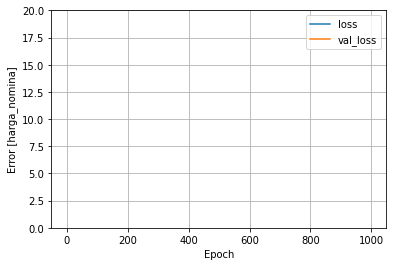

In [25]:
plot_loss(history)

In [26]:
test_result = model.evaluate(test_features,
                             test_labels,
                             verbose=0)
print(test_result)

447199.21875


In [27]:
test_predictions = model.predict(test_features).flatten()

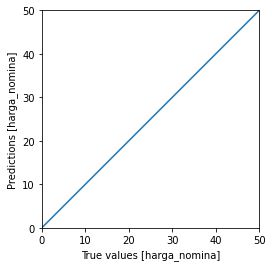

In [28]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values [harga_nomina]')
plt.ylabel('Predictions [harga_nomina]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [29]:
test_predictions

array([ 798645.8 ,  499247.22,  586187.75,  809854.7 ,  776122.6 ,
       1303801.6 ,  809854.7 ,  809854.7 ,  664279.56,  809854.7 ,
        631433.9 ,  632479.6 ,  925382.5 ,  472876.1 ,  784772.06,
        588683.4 ,  620890.8 ,  585263.44,  926004.9 ,  585263.44,
       1149568.  ,  784772.06,  674824.5 ,  631433.9 ,  664279.56,
       1432973.2 , 1397079.8 , 1271891.4 , 1406065.2 ,  948023.44,
       1406065.2 , 1406065.2 ,  749143.  ,  618900.44,  618900.44,
       1097370.6 ,  832857.75, 1797456.6 , 1811543.9 , 1811543.9 ,
       1784740.2 , 1779707.9 , 1062861.9 , 1188174.9 , 1205865.5 ,
       1782057.2 , 1188174.9 , 1183586.  ,  975629.7 ,  583688.6 ,
        560347.7 , 1195218.2 , 1184261.8 , 1796674.2 , 1209709.5 ,
        977731.25,  963715.75, 1796674.2 , 1538076.6 , 1540492.  ,
       1784336.9 , 1651373.  , 1651373.  , 1102534.9 , 1209709.5 ,
        738318.94,  738318.94, 1103240.2 ,  869030.8 , 1471785.2 ,
       1471785.2 , 1471785.2 ,  512182.06,  898893.7 , 1683828

In [30]:
test_labels

11       900000
23       500000
24       600000
25       500000
28      2000000
         ...   
1183     650000
1186     450000
1189     850000
1194     900000
1201    1250000
Name: harga_nomina, Length: 241, dtype: int64

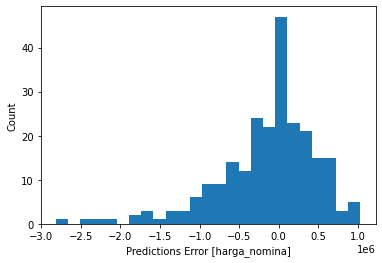

In [31]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Predictions Error [harga_nomina]')
_ = plt.ylabel('Count')

In [32]:
model.save('getkos_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: getkos_model/assets


In [33]:
reloaded = tf.keras.models.load_model('getkos_model')

In [34]:
test_result = reloaded.evaluate(
    test_features, test_labels, verbose=0
)

print(test_result)

447199.21875


In [35]:
converter = tf.lite.TFLiteConverter.from_saved_model('getkos_model')
tflite_model = converter.convert()

In [36]:
with open('model_getkos_regression.tflite', 'wb') as f:
    f.write(tflite_model)

In [37]:
test_features[3:4]

,kota,type_kos,area,facility_score
25,6,2,30,4


In [38]:
model.predict(np.array(test_features[3:4]))

array([[809854.7]], dtype=float32)

In [39]:
test_labels[3:4]

25    500000
Name: harga_nomina, dtype: int64

In [40]:
raw_dataset

,kost_name_rough,kota,type_kos,area,facility_score,harga_nomina
0,Kost Pondok Nirwana Merr Tipe C Surabaya,surabaya,putri,rungkut,6,1600000
1,Kost Pondok Nirwana Merr Tipe B Surabaya,surabaya,putri,rungkut,4,1500000
2,Kost Pondok Nirwana Merr Tipe A Surabaya,surabaya,putri,rungkut,4,1400000
3,Kost Rungkut Mejoyo Selatan X No 26 Rungkut S...,surabaya,putri,rungkut,4,1100000
4,Kost Rungkut Mejoyo Selatan X No.26 Rungkut S...,surabaya,putri,rungkut,4,850000
...,...,...,...,...,...,...
1200,Kost TWKA 32 Lowokwaru Malang,malang,putri,lowokwaru,4,900000
1201,Kost Bu Yudi Griyashanta Tipe C Lowokwaru Malang,malang,putra,lowokwaru,4,1250000
1202,Kost Bu Yudi Griyashanta Tipe A Lowokwaru Malang,malang,putra,lowokwaru,2,900000
1203,Kost Griya Asma Tipe B Lowokwaru Malang,malang,putri,lowokwaru,4,550000


In [41]:
def proc_df(df, y_fld = 'harga_nomina', skip_flds='kost_name_rough',na_dict = {}, max_n_cat = None):

	y = dataset[y_fld].values
	dataset.drop([y_fld], axis=1, inplace=True)

	for n,c in dataset.items(): 
	    if not is_numeric_dtype(c) and (max_n_cat is None or c.nunique()>max_n_cat):
	        dataset[n] = c.cat.codes+1
	    
	res = [pd.get_dummies(dataset, dummy_na=True), y, na_dict]

	return res

In [42]:
raw_dataset['kost_name_rough']

0                Kost Pondok Nirwana Merr Tipe C Surabaya
1                Kost Pondok Nirwana Merr Tipe B Surabaya
2                Kost Pondok Nirwana Merr Tipe A Surabaya
3       Kost Rungkut Mejoyo Selatan  X No 26 Rungkut S...
4       Kost Rungkut Mejoyo Selatan X  No.26 Rungkut S...
                              ...                        
1200                        Kost TWKA 32 Lowokwaru Malang
1201     Kost Bu Yudi Griyashanta Tipe C Lowokwaru Malang
1202     Kost Bu Yudi Griyashanta Tipe A Lowokwaru Malang
1203              Kost Griya Asma Tipe B Lowokwaru Malang
1204                     Kost Cozy Putra Lowokwaru Malang
Name: kost_name_rough, Length: 1205, dtype: object

In [43]:
x, y, nas = proc_df(raw_dataset, y_fld ='harga_nomina', na_dict = {}, max_n_cat = None)

In [44]:
y

array([1600000, 1500000, 1400000, ...,  900000,  550000, 1400000])

In [45]:
x

,kota,type_kos,area,facility_score
0,6,3,54,6
1,6,3,54,4
2,6,3,54,4
3,6,3,54,4
4,6,3,54,4
...,...,...,...,...
1200,4,3,40,4
1201,4,2,40,4
1202,4,2,40,2
1203,4,3,40,4


In [46]:
def get_dict_encode(df_1,df_2,col='kota'):
    
    zip_iterator = zip(
        list(df_1.groupby([col]).size().reset_index(name='counts')[col]), 
        list(df_2.groupby([col]).size().reset_index(name='counts')[col])
    )
    
    return dict(zip_iterator)

In [47]:
dict_kota = get_dict_encode(raw_dataset,x,col='kota')
dict_type_kos = get_dict_encode(raw_dataset,x,col='type_kos')
dict_area = get_dict_encode(raw_dataset,x,col='area')

{
	"type_kos":[
	    {"name":"campur","value":"1"},
	    {"name":"putra","value":"2"},
	    {"name":"putri","value":"3"}
    ]
}

In [48]:
map_kota = {"kota":[]}
for nm, val in dict_kota.items():
    map_kota['kota'].append({"name":nm,"value":val})
    
map_type_kos = {"type_kos":[]} 
for nm, val in dict_type_kos.items():
    map_type_kos['type_kos'].append({"name":nm,"value":val})
    
map_area = {"area":[]}
for nm, val in dict_area.items():
    map_area['area'].append({"name":nm,"value":val})

In [49]:
print(map_kota)
print(map_type_kos)
print(map_area)

{'kota': [{'name': 'bandung', 'value': 1}, {'name': 'jakarta', 'value': 2}, {'name': 'jogja', 'value': 3}, {'name': 'malang', 'value': 4}, {'name': 'semarang', 'value': 5}, {'name': 'surabaya', 'value': 6}]}
{'type_kos': [{'name': 'campur', 'value': 1}, {'name': 'putra', 'value': 2}, {'name': 'putri', 'value': 3}]}
{'area': [{'name': 'antapani', 'value': 1}, {'name': 'astanaanyar', 'value': 2}, {'name': 'babakan ciparay', 'value': 3}, {'name': 'bandung wetan', 'value': 4}, {'name': 'banjarsari', 'value': 5}, {'name': 'banyumanik', 'value': 6}, {'name': 'batu', 'value': 7}, {'name': 'bekasi selatan', 'value': 8}, {'name': 'blimbing', 'value': 9}, {'name': 'bojongloa kidul', 'value': 10}, {'name': 'buahbatu', 'value': 11}, {'name': 'cibeunying kaler', 'value': 12}, {'name': 'cibeunying kidul', 'value': 13}, {'name': 'cicendo', 'value': 14}, {'name': 'cilandak', 'value': 15}, {'name': 'coblong', 'value': 16}, {'name': 'danurejan', 'value': 17}, {'name': 'depok', 'value': 18}, {'name': 'du

In [50]:
print(raw_dataset.head())
print(x.head())

                                     kost_name_rough      kota type_kos  \
0           Kost Pondok Nirwana Merr Tipe C Surabaya  surabaya    putri   
1           Kost Pondok Nirwana Merr Tipe B Surabaya  surabaya    putri   
2           Kost Pondok Nirwana Merr Tipe A Surabaya  surabaya    putri   
3  Kost Rungkut Mejoyo Selatan  X No 26 Rungkut S...  surabaya    putri   
4  Kost Rungkut Mejoyo Selatan X  No.26 Rungkut S...  surabaya    putri   

      area  facility_score  harga_nomina  
0  rungkut               6       1600000  
1  rungkut               4       1500000  
2  rungkut               4       1400000  
3  rungkut               4       1100000  
4  rungkut               4        850000  
   kota  type_kos  area  facility_score
0     6         3    54               6
1     6         3    54               4
2     6         3    54               4
3     6         3    54               4
4     6         3    54               4


In [51]:
print(raw_dataset.columns)
print(x.columns)

Index(['kost_name_rough', 'kota', 'type_kos', 'area', 'facility_score',
       'harga_nomina'],
      dtype='object')
Index(['kota', 'type_kos', 'area', 'facility_score'], dtype='object')


In [52]:
print(raw_dataset[['kota', 'area']].drop_duplicates())
print(x[['kota', 'area']].drop_duplicates())

          kota        area
0     surabaya     rungkut
6     surabaya    sukolilo
11    surabaya      wiyung
15    surabaya      gubeng
20    surabaya  tambaksari
...        ...         ...
1066    malang   lowokwaru
1067    malang      klojen
1086    malang    kepanjen
1109    malang       sukun
1122    malang        batu

[87 rows x 2 columns]
      kota  area
0        6    54
6        6    66
11       6    78
15       6    30
20       6    68
...    ...   ...
1066     4    40
1067     4    38
1086     4    36
1109     4    67
1122     4     7

[87 rows x 2 columns]


In [53]:
df_rd = raw_dataset[['area','kota']].drop_duplicates()
df_encode_rd = x[['area','kota']].drop_duplicates()

In [59]:
# df_rd
df_rd.sort_values(by=['area']).reset_index(drop=True).to_csv('df_rd.csv')

In [60]:
df_encode_rd.sort_values(by=['area']).reset_index(drop=True).to_csv('df_encode_rd.csv')

In [61]:
!ls

 cat_map_area.json
 cat_map.json
 cat_map_kota.json
 cat_map_type_kos.json
 data
 df_encode_rd.csv
 df_rd.csv
 features.csv
 getkos_model
 getkos_nas
 getkos_nas.ipynb
 img_notes
 LICENSE
'merged_data - data_choosen.csv'
 merged_kota_drop_dupl.csv
 model_autokeras
 model_getkos_regression_2020_12_13.tflite
 model_getkos_regression_2020_12_26.tflite
 modeling_get_kos_1.py
 modeling_get_kos.ipynb
 modeling_get_kos.py
 modeling_get_kos_ref_from_autokeras.ipynb
 models_saved_data
'new_mapping_cek - Sheet1.csv'
 pre_processing.ipynb
 pre_processing.py
 README.md
 read_merge_dropdup_data.py
 read_n_merge_data.ipynb
 read_n_parse_data_ndfilter.py
 read_n_parse_data_new.py
 read_n_parse_data.py
 requirements-gpu.txt
 requirements.txt
 score_map.json
 tflearn_regression.ipynb
 tflearn_regression.py


In [62]:
df_new_map = pd.read_csv('new_mapping_cek - Sheet1.csv')

In [68]:
# df_new_map.values
map_area_new = {"area":[]}
for nm, val, kt in df_new_map.values:
    map_area_new['area'].append({"name":nm,"value":val,"kota":kt})

In [69]:
map_area_new

{'area': [{'name': 'antapani', 'value': 1, 'kota': 'bandung'},
  {'name': 'astanaanyar', 'value': 2, 'kota': 'bandung'},
  {'name': 'babakan ciparay', 'value': 3, 'kota': 'bandung'},
  {'name': 'bandung wetan', 'value': 4, 'kota': 'bandung'},
  {'name': 'banjarsari', 'value': 5, 'kota': 'jogja'},
  {'name': 'banyumanik', 'value': 6, 'kota': 'semarang'},
  {'name': 'batu', 'value': 7, 'kota': 'malang'},
  {'name': 'bekasi selatan', 'value': 8, 'kota': 'jogja'},
  {'name': 'blimbing', 'value': 9, 'kota': 'malang'},
  {'name': 'bojongloa kidul', 'value': 10, 'kota': 'bandung'},
  {'name': 'buahbatu', 'value': 11, 'kota': 'bandung'},
  {'name': 'cibeunying kaler', 'value': 12, 'kota': 'bandung'},
  {'name': 'cibeunying kidul', 'value': 13, 'kota': 'bandung'},
  {'name': 'cicendo', 'value': 14, 'kota': 'bandung'},
  {'name': 'cilandak', 'value': 15, 'kota': 'jakarta'},
  {'name': 'coblong', 'value': 16, 'kota': 'bandung'},
  {'name': 'danurejan', 'value': 17, 'kota': 'jogja'},
  {'name': 'd

In [70]:
with open('cat_map_area_kota.json', 'w') as fp:
    json.dump(map_area_new, fp)

In [64]:
with open('cat_map_kota.json', 'w') as fp:
    json.dump(map_kota, fp)
with open('cat_map_type_kos.json', 'w') as fp:
    json.dump(map_type_kos, fp)
with open('cat_map_area.json', 'w') as fp:
    json.dump(map_area, fp)